In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api         as sm
import statsmodels.formula.api as smf

sns.set_theme()

C:\Users\JuanFe\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
df = pd.read_pickle("./data/model.pkl")  
df.head()

,price,odometer,year,long,lat,condition_fair - salvage,condition_good,condition_like new - new,transmission_manual,transmission_other,...,fuel_other,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,size_full-size,size_mid-size,size_sub-compact
2,9997,125666.0,2011.0,-73.0058,40.8004,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21504,24218.0,2017.0,-101.7940,35.1773,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8,8800,54328.0,2012.0,-122.3440,47.7227,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,14899,107171.0,2017.0,-94.3665,38.6716,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,6200,101723.0,2006.0,-80.0880,26.6493,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df = df[df['odometer'] > 0]

In [4]:
transformed, box_cox_lambda = stats.boxcox(df['odometer'])

In [5]:
box_cox_lambda

0.624389229519707

In [6]:
df['odometer'] = transformed

In [7]:
columns = list(df.columns)
columns.remove('price')
columns

['odometer',
 'year',
 'long',
 'lat',
 'condition_fair - salvage',
 'condition_good',
 'condition_like new - new',
 'transmission_manual',
 'transmission_other',
 'drive_fwd',
 'drive_rwd',
 'type_convertible',
 'type_coupe',
 'type_hatchback',
 'type_mini-van',
 'type_other',
 'type_pickup',
 'type_sedan',
 'type_truck',
 'type_van',
 'type_wagon',
 'fuel_electric',
 'fuel_gas',
 'fuel_hybrid',
 'fuel_other',
 'cylinders_3 cylinders',
 'cylinders_4 cylinders',
 'cylinders_5 cylinders',
 'cylinders_6 cylinders',
 'cylinders_8 cylinders',
 'cylinders_other',
 'size_full-size',
 'size_mid-size',
 'size_sub-compact']

In [8]:
X = df[columns]
y = df['price']

In [9]:
X.columns

Index(['odometer', 'year', 'long', 'lat', 'condition_fair - salvage',
       'condition_good', 'condition_like new - new', 'transmission_manual',
       'transmission_other', 'drive_fwd', 'drive_rwd', 'type_convertible',
       'type_coupe', 'type_hatchback', 'type_mini-van', 'type_other',
       'type_pickup', 'type_sedan', 'type_truck', 'type_van', 'type_wagon',
       'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other',
       'cylinders_3 cylinders', 'cylinders_4 cylinders',
       'cylinders_5 cylinders', 'cylinders_6 cylinders',
       'cylinders_8 cylinders', 'cylinders_other', 'size_full-size',
       'size_mid-size', 'size_sub-compact'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.values.reshape(-1,1),
                                                    train_size = 0.9,
                                                    random_state = 42,
                                                    shuffle = True)

In [11]:
X_train.columns

Index(['odometer', 'year', 'long', 'lat', 'condition_fair - salvage',
       'condition_good', 'condition_like new - new', 'transmission_manual',
       'transmission_other', 'drive_fwd', 'drive_rwd', 'type_convertible',
       'type_coupe', 'type_hatchback', 'type_mini-van', 'type_other',
       'type_pickup', 'type_sedan', 'type_truck', 'type_van', 'type_wagon',
       'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other',
       'cylinders_3 cylinders', 'cylinders_4 cylinders',
       'cylinders_5 cylinders', 'cylinders_6 cylinders',
       'cylinders_8 cylinders', 'cylinders_other', 'size_full-size',
       'size_mid-size', 'size_sub-compact'],
      dtype='object')

In [12]:
len(X_train.columns)

34

In [13]:
X_train = sm.add_constant(X_train, prepend=True)
X_test = sm.add_constant(X_test, prepend=True)

model = sm.OLS(endog=y_train, exog=X_train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     473.3
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:29:07   Log-Likelihood:                -95251.
No. Observations:                9612   AIC:                         1.906e+05
Df Residuals:                    9577   BIC:                         1.908e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [14]:
m = len(df.columns)
B = 0.05/m
print(B)

0.0014285714285714286


In [15]:
set(model.pvalues[model.pvalues < B].index)

{'condition_fair - salvage',
 'condition_good',
 'const',
 'cylinders_3 cylinders',
 'cylinders_4 cylinders',
 'cylinders_6 cylinders',
 'cylinders_8 cylinders',
 'cylinders_other',
 'drive_fwd',
 'fuel_electric',
 'fuel_gas',
 'fuel_hybrid',
 'fuel_other',
 'long',
 'odometer',
 'size_full-size',
 'transmission_manual',
 'transmission_other',
 'type_convertible',
 'type_hatchback',
 'type_pickup',
 'type_sedan',
 'type_truck',
 'type_wagon',
 'year'}

In [16]:
variables = set(model.pvalues[model.pvalues < B].index)
variables = list(variables)
variables.remove('const')
variables.sort()
print('Variables statistically significant:', variables)

Variables statistically significant: ['condition_fair - salvage', 'condition_good', 'cylinders_3 cylinders', 'cylinders_4 cylinders', 'cylinders_6 cylinders', 'cylinders_8 cylinders', 'cylinders_other', 'drive_fwd', 'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other', 'long', 'odometer', 'size_full-size', 'transmission_manual', 'transmission_other', 'type_convertible', 'type_hatchback', 'type_pickup', 'type_sedan', 'type_truck', 'type_wagon', 'year']


In [17]:
X = df[variables]
y = df['price']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.values.reshape(-1,1),
                                                    train_size = 0.9,
                                                    random_state = 42,
                                                    shuffle = True)

In [19]:
len(X_train.columns)

24

In [20]:
X_train = sm.add_constant(X_train, prepend=True)
X_test = sm.add_constant(X_test, prepend=True)

model = sm.OLS(endog=y_train, exog=X_train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     668.1
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:29:08   Log-Likelihood:                -95265.
No. Observations:                9612   AIC:                         1.906e+05
Df Residuals:                    9587   BIC:                         1.908e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [21]:
y_train = y_train.flatten()
prediccion_train = model.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

C:\Users\JuanFe\AppData\Local\Temp/ipykernel_15308/3455868389.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
C:\Users\JuanFe\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 0.98, 'Diagnóstico residuos')

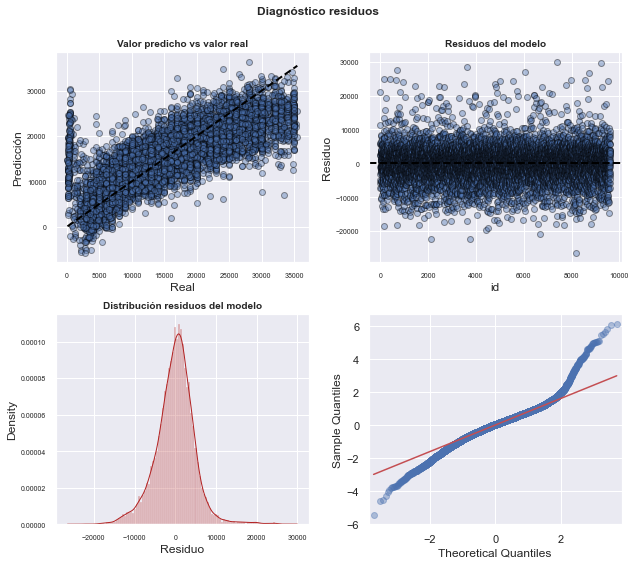

In [22]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold")

In [23]:
prediccion_test = model.predict(exog = X_test)

In [24]:
data = {'Prediccion' : list(prediccion_test),
        'Test' : list(y_test.flatten())}

data = pd.DataFrame.from_dict(data)
data.head()

,Prediccion,Test
0,12852.712158,14400
1,13956.746595,10995
2,15400.924804,11400
3,14842.315624,15900
4,9186.272450,7000


In [25]:
def Losses(Prediccion, Test):
    return np.minimum((Prediccion - Test),0)

In [26]:
data['Losses'] = data.apply(lambda x: Losses(x.Prediccion, x.Test), axis=1)

In [27]:
def Profits(Prediccion, Test):
    return np.maximum((Prediccion - Test),0)

In [28]:
data['Profits'] = data.apply(lambda x: Profits(x.Prediccion, x.Test), axis=1)

In [29]:
def PBuying(Prediccion, Test):
    return ( 1 - np.minimum(1, ((Prediccion/Test) - 1) ) )

In [30]:
data['PBuying'] = data.apply(lambda x: PBuying(x.Prediccion, x.Test), axis=1)

In [31]:
data.head()

,Prediccion,Test,Losses,Profits,PBuying
0,12852.712158,14400,-1547.287842,0.000000,1.107451
1,13956.746595,10995,0.000000,2961.746595,0.730628
2,15400.924804,11400,0.000000,4000.924804,0.649042
3,14842.315624,15900,-1057.684376,0.000000,1.066521
4,9186.272450,7000,0.000000,2186.272450,0.687675


In [32]:
len(data)

1069

In [33]:
data.Losses.sum()/len(data)

-1711.9297591202471

In [34]:
data.Profits.sum()/len(data)

1893.8567664264765

In [35]:
data[data.PBuying < 1].PBuying.mean()

0.6502328469540196